# Financial Metrics Collector Demo

This notebook demonstrates how to use the Financial Metrics collector module to retrieve key financial data for companies.

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path

# Add the project root to the Python path
project_root = Path.cwd().parent.parent
if str(project_root) not in sys.path:
	sys.path.append(str(project_root))
project_root

PosixPath('/data/home/eak/learning/nganga_ai/tumkwe-invest/tumkwe-invest')

In [2]:
# Import the financial_metrics module
from tumkwe_invest.datacollection.collectors.financial_metrics import (
	get_key_metrics_yf,
	get_alpha_vantage_metrics,
	get_comprehensive_metrics,
	get_quarterly_financial_data
)

## Check if ALPHA_VANTAGE_API_KEY is Set

Part of this module uses Alpha Vantage API. Let's check if the API key is set.

In [3]:
import os

# Check if ALPHA_VANTAGE_API_KEY is set
alpha_vantage_api_key = os.environ.get('ALPHA_VANTAGE_API_KEY')
if not alpha_vantage_api_key:
	print("WARNING: ALPHA_VANTAGE_API_KEY environment variable is not set.")
	print("Some functions will have limited functionality.")
	print("You can get a free API key at https://www.alphavantage.co/support/#api-key")
	print("\nExample: export ALPHA_VANTAGE_API_KEY='your_api_key_here'")
else:
	print("ALPHA_VANTAGE_API_KEY is set, full functionality is available.")

ALPHA_VANTAGE_API_KEY is set, full functionality is available.


## Get Yahoo Finance Key Metrics

Let's fetch key financial metrics for some example companies using Yahoo Finance.

In [4]:
# Define ticker symbols for some popular companies
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

In [5]:
# Get key metrics for Apple from Yahoo Finance
apple_metrics = get_alpha_vantage_metrics('AAPL')
apple_metrics

KeyMetrics(symbol='AAPL', source='alpha_vantage', last_updated=datetime.datetime(2025, 3, 21, 22, 36, 39, 583990), validation_warnings=[], is_valid=True, date=datetime.datetime(2025, 3, 21, 22, 36, 39, 583963), pe_ratio=33.93, pb_ratio=48.18, dividend_yield=0.0046, eps=6.31, market_cap=3216231891000.0, debt_to_equity=None, return_on_equity=1.365, return_on_assets=0.225, profit_margin=0.243, current_ratio=None, quick_ratio=None)

In [6]:
# Get key metrics for Apple from Yahoo Finance
apple_metrics = get_key_metrics_yf('AAPL')
apple_metrics

KeyMetrics(symbol='AAPL', source='yahoo_finance', last_updated=datetime.datetime(2025, 3, 21, 22, 36, 40, 99839), validation_warnings=[], is_valid=True, date=datetime.datetime(2025, 3, 21, 22, 36, 40, 99817), pe_ratio=34.701115, pb_ratio=49.182064, dividend_yield=0.47, eps=6.29, market_cap=3278873821184, debt_to_equity=145.0, return_on_equity=1.3652, return_on_assets=0.22518998, profit_margin=0.24295, current_ratio=0.923, quick_ratio=0.783)

## Get Comprehensive Metrics

Now let's use the comprehensive metrics function that combines data from multiple sources.

In [7]:
# Function to convert metrics object to a dictionary for DataFrame creation
from dataclasses import asdict
def metrics_to_dict(metrics):
	if metrics is None:
		return {}
	return asdict(metrics)
	return {
		'symbol': metrics.symbol,
		'source': metrics.source,
		'date': metrics.date,
		'pe_ratio': metrics.pe_ratio,
		'pb_ratio': metrics.pb_ratio,
		'dividend_yield': metrics.dividend_yield,
		'eps': metrics.eps,
		'market_cap': metrics.market_cap,
		'profit_margin': metrics.profit_margin,
		'debt_to_equity': metrics.debt_to_equity,
		'current_ratio': metrics.current_ratio,
		'return_on_equity': metrics.return_on_equity,
		'return_on_assets': metrics.return_on_assets,
	}

In [8]:
# Get comprehensive metrics for all tickers
all_metrics = []

for ticker in tickers:
	metrics = get_comprehensive_metrics(ticker)
	if metrics:
		all_metrics.append(metrics_to_dict(metrics))
		print(f"Retrieved comprehensive metrics for {ticker}")
	else:
		print(f"Failed to retrieve metrics for {ticker}")

Retrieved comprehensive metrics for AAPL
Retrieved comprehensive metrics for MSFT
Retrieved comprehensive metrics for GOOGL
Retrieved comprehensive metrics for AMZN
Retrieved comprehensive metrics for TSLA


In [9]:
# Create a DataFrame to visualize all metrics
metrics_df = pd.DataFrame(all_metrics)

# Format the numeric columns
numeric_cols = ['pe_ratio', 'pb_ratio', 'dividend_yield', 'eps', 
				'profit_margin', 'debt_to_equity', 'current_ratio', 
				'return_on_equity', 'return_on_assets']

for col in numeric_cols:
	if col in metrics_df.columns:
		metrics_df[col] = metrics_df[col].astype(float)

# Display the DataFrame
display(metrics_df)

,symbol,source,last_updated,validation_warnings,is_valid,date,pe_ratio,pb_ratio,dividend_yield,eps,market_cap,debt_to_equity,return_on_equity,return_on_assets,profit_margin,current_ratio,quick_ratio
0,AAPL,combined,2025-03-21 22:36:41.494488,[],True,2025-03-21 22:36:41.494471,34.701115,49.182064,0.47,6.29,3278873821184,145.000,1.36520,0.22519,0.24295,0.923,0.783
1,MSFT,combined,2025-03-21 22:36:41.908395,[],True,2025-03-21 22:36:41.908379,31.502417,9.610435,0.86,12.42,2908619014144,33.998,0.34291,0.14649,0.35428,1.351,1.204
2,GOOGL,combined,2025-03-21 22:36:42.333122,[],True,2025-03-21 22:36:42.333106,20.396767,6.159943,0.49,8.04,2011501428736,8.655,0.32908,0.16740,0.28604,1.837,1.661
3,AMZN,combined,2025-03-21 22:36:43.716046,[],True,2025-03-21 22:36:43.716029,35.416970,7.268114,NaN,5.54,2079374704640,54.342,0.24290,0.07438,0.09287,1.064,0.837
4,TSLA,combined,2025-03-21 22:36:44.075510,[],True,2025-03-21 22:36:44.075493,122.517250,10.969918,NaN,2.03,799980716032,18.489,0.10420,0.04186,0.07259,2.025,1.427


## Visualize Key Financial Metrics

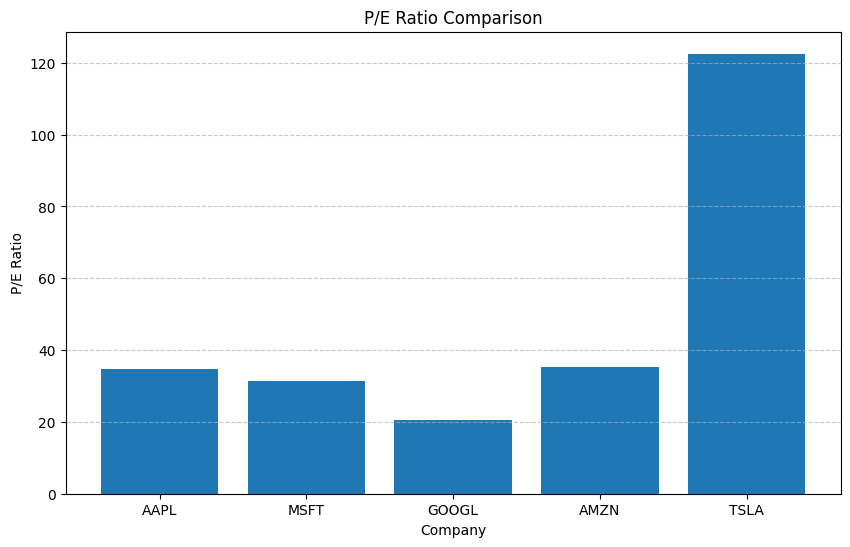

In [10]:
# Create a bar chart comparing P/E ratios
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['symbol'], metrics_df['pe_ratio'])
plt.title('P/E Ratio Comparison')
plt.xlabel('Company')
plt.ylabel('P/E Ratio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Get Quarterly Financial Data

In [11]:
# Get quarterly financial data for Apple
apple_quarterly = get_quarterly_financial_data('AAPL')

print(f"Retrieved {len(apple_quarterly['income_statement'])} quarterly income statements")
print(f"Retrieved {len(apple_quarterly['balance_sheet'])} quarterly balance sheets")
print(f"Retrieved {len(apple_quarterly['cash_flow'])} quarterly cash flows")

Retrieved 7 quarterly income statements
Retrieved 7 quarterly balance sheets
Retrieved 7 quarterly cash flows


In [12]:
# Let's examine the first quarterly income statement
if apple_quarterly['income_statement']:
	first_statement = apple_quarterly['income_statement'][0]
	print(f"Date: {first_statement.date}")
	print(f"Fiscal Quarter: {first_statement.fiscal_quarter}")
	print(f"Fiscal Year: {first_statement.fiscal_year}")
	
	# Show some key data points
	data = first_statement.data
	
	key_items = [
		'Total Revenue', 
		'Gross Profit', 
		'Operating Income', 
		'Net Income', 
		'Research And Development', 
		'Selling General And Administration'
	]
	
	print("\nKey Financial Items (in USD):")
	for item in key_items:
		if item in data:
			print(f"{item}: ${data[item]:,.2f}")

Date: 2024-12-31 00:00:00
Fiscal Quarter: 4
Fiscal Year: 2024

Key Financial Items (in USD):
Total Revenue: $124,300,000,000.00
Gross Profit: $58,275,000,000.00
Operating Income: $42,832,000,000.00
Net Income: $36,330,000,000.00
Research And Development: $8,268,000,000.00
Selling General And Administration: $7,175,000,000.00
